## Assignment 2:  Clustering - unsupervised learning

In [4]:
import pandas as pd

In [5]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

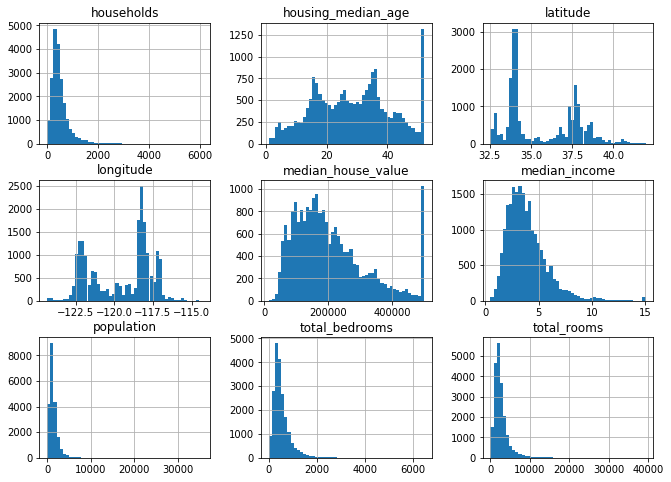

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(11,8))
plt.show()

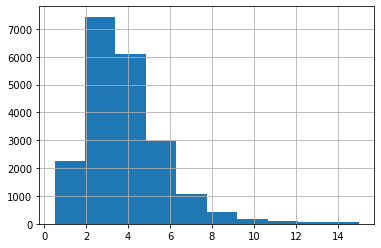

In [10]:
housing["median_income"].hist()

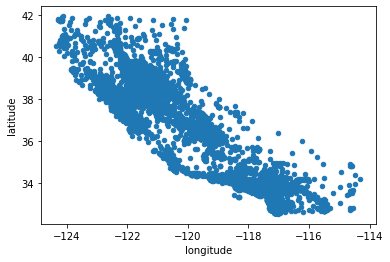

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")

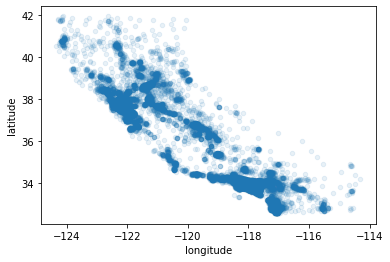

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

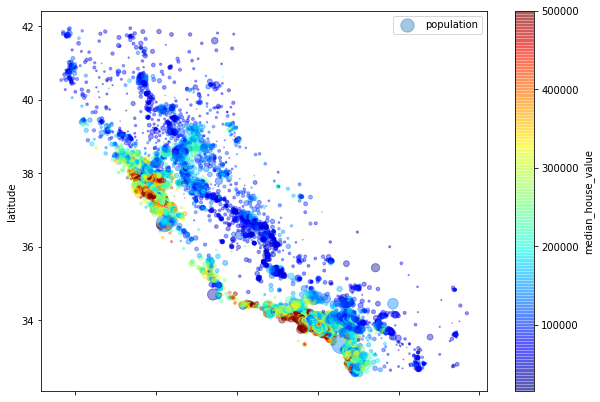

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()

## Task begins here

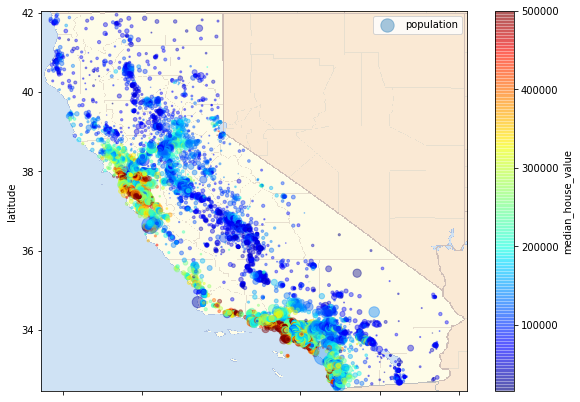

In [15]:
# step-1: show the scatter plot in a figure (see the code in the above cell)
# step-2: show the image california.png' in the same figure
# use imread function from skimage to show the image
# like this from skimage.io import imread
# read the skimage document about imread
# we need to align the image of the map with the dots.
# use the extent parameter of imshow,
# I can directly give you the values- which can be estimated from min/max of  "longitude" and "latitude"
# extent=[-124.55, -113.80, 32.45, 42.05]

import skimage.io
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt


from skimage.io import imread, imshow
california = skimage.io.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),)
ax.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)




In [16]:
# normalize the values in each column using StandardScaler from sklearn
# like this from sklearn.preprocessing import StandardScaler
# read the document about StandardScaler
# step-1: create a StandardScaler object (a function object)
# step-2: remove "ocean_proximity" from the dataframe housing because ocean_proximity is not number
# step-3: process the new dataframe using the StandardScaler object
# step-4: the output from the StandardScaler object is numpy array, not dataframe
#         thus, you convert this numpy array to a dataframe, using pd.DataFrame(...)
#         Let's name this dataframe data, and run data.head() to show the first five rows 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
if 'ocean_proximity' in housing:
    del housing['ocean_proximity']
scaler.fit(housing)
data = pd.DataFrame(scaler.transform(housing), columns = housing.columns)



In [17]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900


In [18]:
housing.columns[:-1]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [19]:
#check to see if there is nan in data
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [20]:
# there are 207 NaN in the column 'total_bedrooms'
# replace NaN with the mean value of that column
# use the methods fillna and mean for the column 'total_bedrooms'
# after that, run data.isnull().sum() to see if nan is replaced

average_bedrooms = pd.DataFrame.mean(data['total_bedrooms'])
data.fillna(average_bedrooms, inplace=True)

In [21]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### now, we have a clean dataframe `data`, and we can apply k-means for clustering

In [23]:
# use KMeans from sklearn.cluster
# set the number of clusters to 2
# run the algorithm, and we get the cluster label of each data point
# which variable 'stores' the labels? - check the document of kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(data)
label = kmeans.labels_
label

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

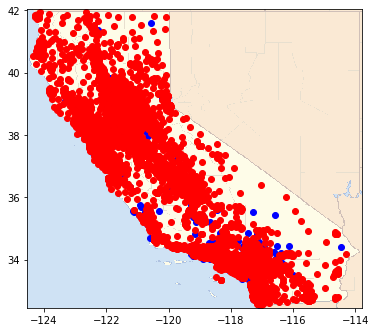

In [24]:
# visualize the k-means results
# use blue dots to show data points in cluster 0
# use red dots to show data points in cluster 1

fig, ax = plt.subplots(figsize=(6,6))
cluster1 = np.where(label==0)
cluster2 = np.where(label==1)
cluster1_list = list(cluster1)
cluster2_list = list(cluster2)

for i in cluster1_list:
    ax.scatter(housing['longitude'][i], housing['latitude'][i], c='blue')
for i in cluster2_list:
    ax.scatter(housing['longitude'][i], housing['latitude'][i], c='red')
ax.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    

In the above k-means, we use all feature components of each data point. <br>
Let's try to use three feature components for each data point <br>
Only use three columns 'Latitude', 'longitude', and 'median_house_value' to do k-means

In [25]:
# select the three columns in data to make a new array
# run k-means on the new array, set the number of clusters to 2

new_data = data[['longitude','latitude','median_house_value']]
new_data_pd = pd.DataFrame(new_data)
kmeans_new = KMeans(n_clusters=2).fit(new_data_pd)
label_new = kmeans_new.labels_

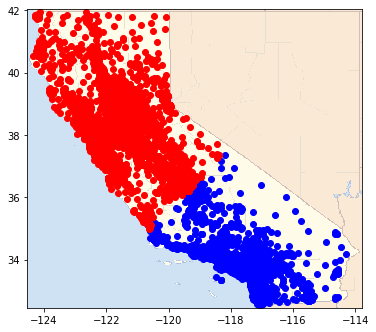

In [26]:
# visualize the results

fig, ax = plt.subplots(figsize=(6,6))
cluster1_new = np.where(label_new==0)
cluster2_new = np.where(label_new==1)
cluster1_list_new = list(cluster1_new)
cluster2_list_new = list(cluster2_new)

for i in cluster1_list_new:
    ax.scatter(housing['longitude'][i], housing['latitude'][i], c='blue')
for i in cluster2_list_new:
    ax.scatter(housing['longitude'][i], housing['latitude'][i], c='red')
ax.imshow(california, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

https://scikit-learn.org/stable/modules/clustering.html <br>